In [ ]:
from pycbc.inference import models
from pycbc.distributions import Uniform

my_model = models.TestNormal(('x'), mean=(0))

from pycbc.inference import sampler

engine = sampler.EmceeEnsembleSampler(my_model, nwalkers=10000, nprocesses=1)

engine.set_initial_conditions(Uniform(x=(-2, -1)))

engine.run_mcmc(200)

import pylab, numpy

xchain = engine.samples['x']

values = xchain[:,-1]  
pylab.hist(values)
pylab.xlabel('x')
pylab.show()
print (values.mean(), numpy.var(values))

In [1]:
from pycbc.inference import models
from pycbc.distributions import Uniform

my_model = models.TestNormal(('x', 'y'), mean=(0, 2))

from pycbc.inference import sampler

engine = sampler.EmceeEnsembleSampler(my_model, nwalkers=1000, nprocesses=8)

pos = Uniform(
        x=(-1, 1),
        y=(-1, 1),
       )
engine.set_initial_conditions(pos)

# Run the mcmc for 200 iterations
engine.run_mcmc(200)

import pylab, numpy

# When we have multiple parameters, we can just access each by name as
# samples is a dictionary.

for param in ['x', 'y']:
    values = engine.samples[param][:,-1]
    pylab.hist(values, label=param)
    pylab.legend()
    print (values.mean(), numpy.var(values))

0.03679958435239017 1.0249442495504255
2.0075259230126474 0.9718449255532857


In [17]:
from pycbc.inference.models.base import BaseModel
from scipy.stats import norm

class ExampleModel(BaseModel):
    def __init__(self, param_name, **kwargs):
        # Initialize the base model. It needs to know what the
        # variable parameters are, given here as (param_name).
        super(ExampleModel, self).__init__((param_name), **kwargs)   
        self.param = param_name
    
    def _loglikelihood(self):
        # self.current_params is a dictionary of the parameters 
        # we need to evaluate the log(likelihood) for. The name
        # of the parameters are the ones we gave to the BaseModel init
        # method in the 'super' command above.
        pos = self.current_params[self.param]
        
        #We'll use the logpdf of the normal distribution from scipy
        return norm.logpdf(pos)
    
my_model = ExampleModel('x')



In [21]:
from pycbc.inference import sampler

engine = sampler.EmceeEnsembleSampler(my_model, nwalkers=1000, nprocesses=8)
engine.set_initial_conditions(Uniform(x=(-1, 1)))
engine.run_mcmc(200)

OSError: [Errno 24] Too many open files

-0.01762433997438846 0.9150906667804388


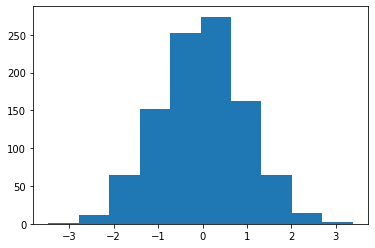

In [20]:
import pylab, numpy

xchain = engine.samples['x']
values = xchain[:,-1]  
pylab.hist(values)
print (values.mean(), numpy.var(values))

In [22]:
making a model that uses data

SyntaxError: invalid syntax (<ipython-input-22-e2bf4a9136db>, line 1)

In [23]:
from pycbc.inference.models.base import BaseModel
from scipy.stats import norm
import numpy

class ExampleModel(BaseModel):
    def __init__(self, data, **kwargs):
        # We'll used fixed param names
        params = ('sigma', 'mean')
        
        super(ExampleModel, self).__init__(params, **kwargs)
        self.data = data
    
    def _loglikelihood(self):
        # self.current_params is a dictionary of the parameters 
        # we need to evaluate the log(likelihood) for.
        sigmasq = self.current_params['sigma'] ** 2.0
        mean = self.current_params['mean']
        n = len(self.data)
        
        # log likihood for a normal distribution
        loglk = -n / 2.0 * numpy.log(2 * numpy.pi * sigmasq)
        loglk += - 1. / (2 * sigmasq) * ((self.data - mean)**2.0).sum()
        return loglk

# Create some synthetic data
numpy.random.seed(10)
data = norm.rvs(size=10000)
my_model = ExampleModel(data)

In [25]:
from pycbc.inference import sampler

engine = sampler.EmceeEnsembleSampler(my_model, nwalkers=100, nprocesses=8)
pos = Uniform(sigma=(.5, 2),
              mean=(-1, 1)
             )
engine.set_initial_conditions(pos)
engine.run_mcmc(400)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-892976c0c1d1>", line 3, in <module>
    engine = sampler.EmceeEnsembleSampler(my_model, nwalkers=100, nprocesses=8)
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/pycbc/inference/sampler/emcee.py", line 85, in __init__
    pool = choose_pool(mpi=use_mpi, processes=nprocesses)
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/pycbc/pool.py", line 138, in choose_pool
    pool = BroadcastPool(processes)
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/pycbc/pool.py", line 56, in __init__
    super(BroadcastPool, self).__init__(processes, noint, initargs, **kwds)
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 158, in __init__
    self._setup_qu

OSError: [Errno 24] Too many open files

In [26]:
import pylab, numpy

xchain = engine.samples['sigma']
values = xchain[:,-1]  

pylab.figure()
pylab.title('sigma')
pylab.hist(engine.samples['sigma'][:,-1])

pylab.figure()
pylab.hist(engine.samples['mean'][:,-1])
pylab.title('mean')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-7e02cc0bbede>", line 3, in <module>
    xchain = engine.samples['sigma']
KeyError: 'sigma'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/habourynathan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Use

KeyError: 'sigma'